In [1]:
import os 
import tqdm
import glob
import pydicom
import pandas as pd
import matplotlib.pyplot as plt

train_path = "train"
os.chdir(train_path)
os.getcwd()

'/Volumes/Transcend/medical_image_liver_fibrosis/DataSet/train'

In [2]:
train_files = glob.glob('[0-9]*.dcm')
train_files[:5]

['842.dcm', '6461.dcm', '9752.dcm', '2607.dcm', '5168.dcm']

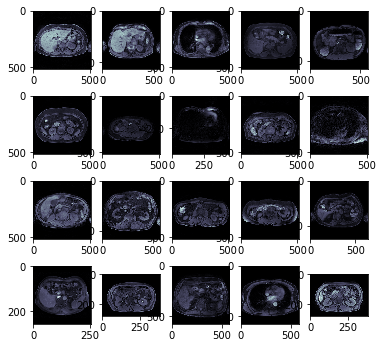

In [13]:
count = 0

fig=plt.figure(figsize=(6, 6))

rows = 4
columns = 5

for i in range(1, columns*rows +1):
    data = pydicom.dcmread(train_files[count])
    fig.add_subplot(rows, columns, i)
    plt.imshow(data.pixel_array, cmap=plt.cm.bone)
    count += 1
plt.show()

In [16]:
header = ['file_name', 'P_ID', 'P_name', 'P_birth', "study_ID", "study_date", "study_time", "slice_number"]

my_list = []

for train_file in tqdm.tqdm(train_files):
    data = pydicom.dcmread(train_file)
    try:
        res = [
            train_file,
            data.PatientID,
            data.PatientName,
            data.PatientBirthDate,
            # data.PatientWeight,
            data.StudyID,
            data.StudyDate,
            data.StudyTime,
            data.InstanceNumber
        ]

        my_list.append(res)
    except:
        print(f"Unexpected error occured {train_file}")

df = pd.DataFrame(my_list, columns=header)
df

100%|██████████| 10195/10195 [02:14<00:00, 75.83it/s]


,file_name,P_ID,P_name,P_birth,study_ID,study_date,study_time,slice_number
0,842.dcm,,,,,,,56
1,6461.dcm,,,19380511,568164733,20180406,083213,60
2,9752.dcm,,,19351027,568861013,20180814,095653,85
3,2607.dcm,,,19600828,GM20A0E,20141014,092109,44
4,5168.dcm,,,19660110,537176077,20171212,163437,10
...,...,...,...,...,...,...,...,...
10190,1317.dcm,,,19770221,569064761,20181016,183241,47
10191,683.dcm,,,19690813,GM20A0E,20120311,125443,88
10192,9993.dcm,,,19321210,505271653,20160808,101413,60
10193,7766.dcm,,,19420823,537149023,20170712,090343,94


In [23]:
df.to_csv("train_data_df.csv")

In [17]:
len(pd.unique(df.study_ID))

100

In [18]:
len(pd.unique(df.P_birth))

109

In [27]:
group = df.groupby(['P_birth', 'study_ID', 'study_date', 'study_time'])
len(group)

124

(array([110.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  14.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

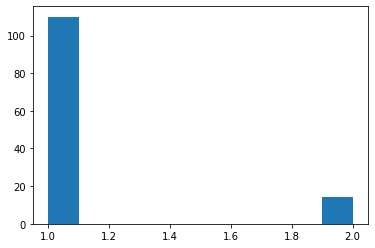

In [28]:
import matplotlib.pyplot as plt

plt.hist(group.slice_number.min())

(array([23.,  0.,  0.,  0.,  0.,  8.,  5.,  0.,  1., 87.]),
 array([ 39. ,  45.1,  51.2,  57.3,  63.4,  69.5,  75.6,  81.7,  87.8,
         93.9, 100. ]),
 <a list of 10 Patch objects>)

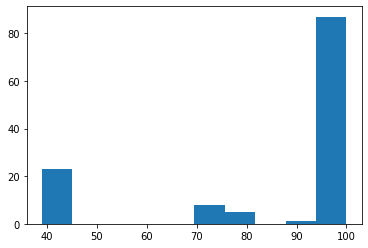

In [29]:
plt.hist(group.slice_number.max())

In [37]:
for idx, line in enumerate(group):
#     print(line[1].file_name.to_list())
#     print()
        
    if idx == 0:
        print(line[0])


('', '', '', '')
